Lambda School Data Science

*Unit 1, Sprint 1, Module 4 - Assignment*

**Replicate the lesson code.**

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

In [0]:
# READ IN DATA
inconv = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [0]:
# GENERATE FINAL DATA
last = inconvenient.tail(1)
final = last[[col for col in inconvenient if col.endswith('_pct')]].T
final.index = range(1,11)
final.columns = ['percent']

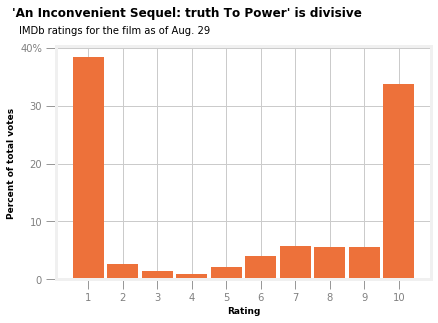

In [169]:
# SET STYLESHEET
plt.style.use('fivethirtyeight')

# FIGURE AXES SYNTAX
fig, ax = plt.subplots()

# Set background color to white
fig.patch.set(facecolor='white')

# plot 'final' data
ax.bar(x=range(1,11), height=final['percent'], width=0.9, color='#ED713A')

# set axes backgound color
ax.set(facecolor='white')

# set title/subtitle
ax.set_title("'An Inconvenient Sequel: truth To Power' is divisive", 
             fontsize=12, fontweight='bold', x=0.35, y=1.1)
ax.text(s='IMDb ratings for the film as of Aug. 29', y=42.5, x=-1, 
        fontsize=10)

# set x/y labels
ax.set_xlabel('Rating', fontsize=9, fontweight='bold')
ax.set_ylabel('Percent of total votes', fontsize=9, fontweight='bold')

# set axes ticks/grid
ax.set_yticklabels(['0', '10', '20', '30', '40%'], fontsize=10, 
                   color='grey')
ax.set_yticks(range(0,50,10))
ax.set_xticklabels(range(1,11,1), rotation='horizontal', fontsize=10,
                   color='grey')
ax.set_xticks(range(1,11))
ax.tick_params(length=10, color='grey')

# extends tick marks
fig.show()

# change font

# add line

# add footer text

# remove outside grey border

In [170]:
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)
display(example)

**Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).**

In [0]:
# IMPORT DATA
war2018 = pd.read_csv('2018_war.csv')
war2019 = pd.read_csv('2019_war.csv')
# I SHOULD UPLOAD MY DATA TO GOOGLE DRIVE SOMEWHERE

In [0]:
# MERGE/RETRIEVE/CALCULATE DATA
combined = pd.merge(war2018, war2019, 
                    on='playerid')
clist = ['Name_x', 'WAR_x', 'WAR_y']
war_calc = combined[clist]
war_calc = war_calc.rename(columns={'Name_x': 'Name', 
                                    'WAR_x': '2018', 
                                    'WAR_y': '2019'})
war_calc['change'] = war_calc['2019'] - war_calc['2018']
war_calc.sort_values('change', ascending=False, inplace=True)
# HAVE TO RESET INDEX FOR PLOTTING, SEE FUNCTION BELOW
war_calc.reset_index(drop=True, inplace=True)
# CALCULATES POSITIVE/NEGATIVE VALUES NECESSARY FOR PLOTTING
war_calc['positive'] = war_calc['change'] > 0

In [0]:
# RETRIEVES INDEX POSITION OF PLAYERS I WANT TO HIGHLIGHT
twins = ['Mitch Garver', 'Jorge Polanco', 'Miguel Sano', 'Max Kepler']
condition = war_calc['Name'].isin(twins)
results = war_calc[condition].index.values.tolist()

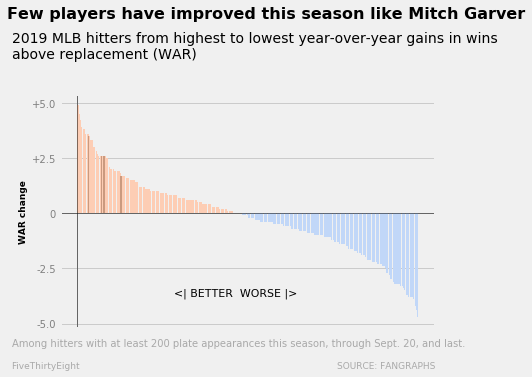

In [174]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

# PLOTS war_calc DATA
# MAPS POSITIVE/NEGATIVE COLORS
ax.bar(x=range(1,263), height=war_calc['change'], 
        color=war_calc['positive'].map({True:'#FDCDB4', False:'#C1D7F8'}))

# SETS Y TICKS
ax.set_yticklabels(['-5.0', '-2.5', '0', '+2.5', '+5.0'], 
                   fontsize=10, 
                   color='grey')
ax.set_yticks([-5.0, -2.5, 0.0, 2.5, 5.0])

# SETS A SINGLE X TICK FOR 0, REMOVES LINES
ax.set_xticks([0])
ax.set_xticklabels([])

# SETS THE TITLE
ax.set_title('Few players have improved this season like Mitch Garver', 
             fontsize=16, fontweight='bold', 
             x=0.55, y=1.3)
ax.text(s='2019 MLB hitters from highest to lowest year-over-year gains in wins\nabove replacement (WAR)',
        x=-50, y=7)

# SETS TEXT ON BOTTOM, PROBABLY AN EASIER WAY TO DO ALIGNMENT...
ax.text(s='Among hitters with at least 200 plate appearances this season, through Sept. 20, and last.',
        x=-50, y=-6, fontsize=10, color='darkgrey')
ax.text(s='FiveThirtyEight', x=-50, y=-7, fontsize=9, color='darkgrey')
ax.text(s='SOURCE: FANGRAPHS', x=200, y=-7, fontsize=9, color='darkgrey')
ax.text(s='<| BETTER  WORSE |>', x=75, y=-3.75, fontsize=11, color='black')

# SETS AXIS LINES TO BLACK, PROBABLY A BETTER WAY TO DO THIS...
ax.axhline(y=0, color='black', linewidth=0.5)
ax.axvline(x=0, color='black', linewidth=0.5)

ax.set_ylabel('WAR change', fontsize=9, fontweight='bold')

# FUNCTION TO HIGHLIGHT INDIVIDUAL PLAYERS
def highlight(indexes):
  for i in range(len(indexes)):
    ax.bar(results[i], war_calc.loc[results[i]][3], color='#CA9A7F', width=0.9)

highlight(results)

fig.show()

In [175]:
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2019/09/Sawchik-GarverMLB-0919-1.png?w=575'
example = Image(url=url, width=500)
display(example)